In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def get_len(line : np.array, fig : plt.Figure, pos, name, print_max = False):
    ax = fig.add_subplot(pos)
    ax.plot(line)
    if print_max:
        max = np.max(line)
        idx = np.where(line == max)[0]
        for id, indx in enumerate(idx):
            ax.plot([indx]*(int(max)+1), np.arange(0, int(max)+1), '--r')
            ax.text(indx, 0+30*id, 'Максимум в '+str(indx))
    plt.title(name)

# 1. Рассмотрим задачу измерения высоты полета самолета

In [3]:
x = np.array([0]*1000)
y = np.array([0]*1000)

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\4191571877.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


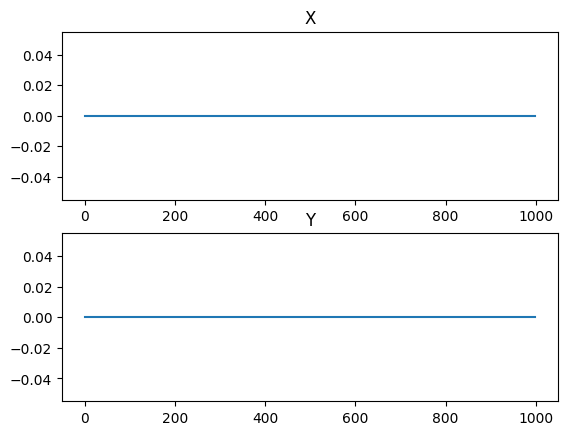

In [4]:
fig = plt.figure()
get_len(x, fig, 211, 'X')
get_len(y, fig, 212, 'Y')
fig.show()

In [5]:
x[1:100] = 5
y[301:400] = 1

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\4191571877.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


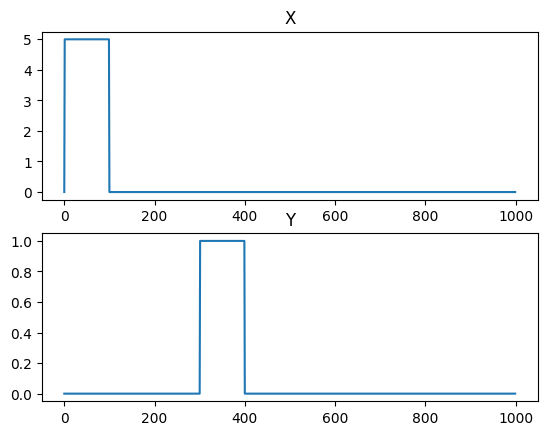

In [6]:
fig = plt.figure()
get_len(x, fig, 211, 'X')
get_len(y, fig, 212, 'Y')
fig.show()

In [7]:
R = np.correlate(x, y, 'full')

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2472325478.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


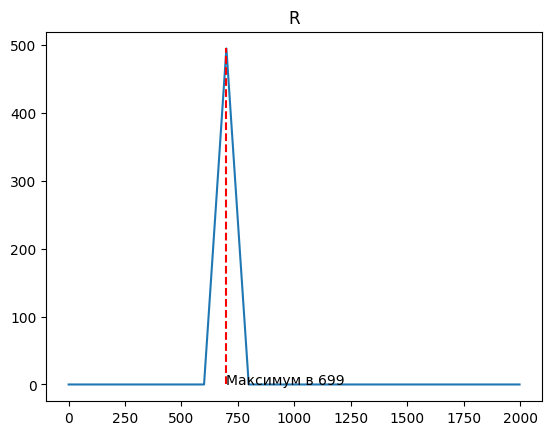

In [8]:
fig = plt.figure()
get_len(R, fig, 111, 'R', True)
fig.show()

In [9]:
x[400:500] = 5
y[700:800] = 1

In [10]:
x[600:700] = 5
y[900:1000] = 1

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\4191571877.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


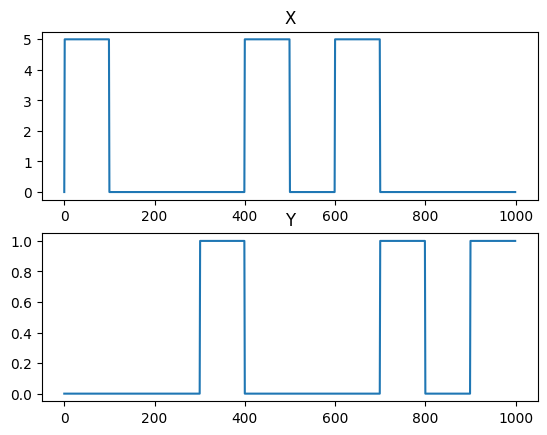

In [11]:
fig = plt.figure()
get_len(x, fig, 211, 'X')
get_len(y, fig, 212, 'Y')
fig.show()

In [12]:
R = np.convolve(x, x, 'full')

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2472325478.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


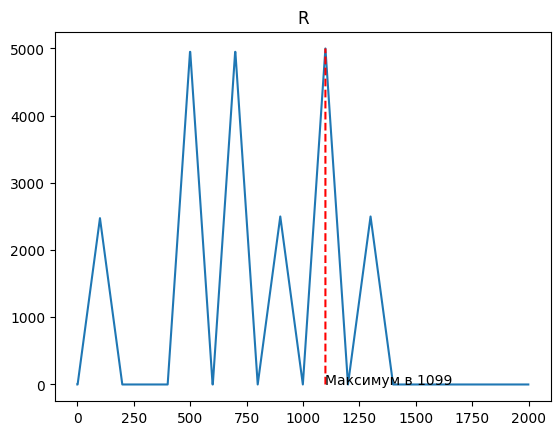

In [13]:
fig = plt.figure()
get_len(R, fig, 111, 'R', True)
fig.show()

# 2. Создайте  еще  более  сложный  сигнал,  в  котором  нет  периодических повторов  импульсов.

In [14]:
x = np.random.sample((1000))
x = np.array(list(map(lambda item: item*(item>0.5), x)))
y =np.concatenate([[0]*100, x])[:1000]

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\4191571877.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


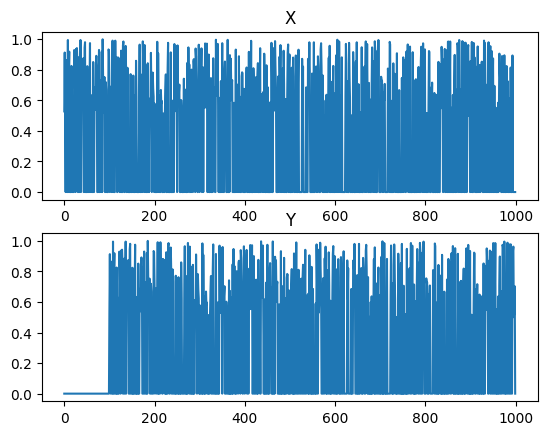

In [15]:
fig = plt.figure()
get_len(x, fig, 211, 'X')
get_len(y, fig, 212, 'Y')
fig.show()

In [16]:
R = np.convolve(x, y, 'full')
C = np.correlate(x, x, 'full')


C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\580180936.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\580180936.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


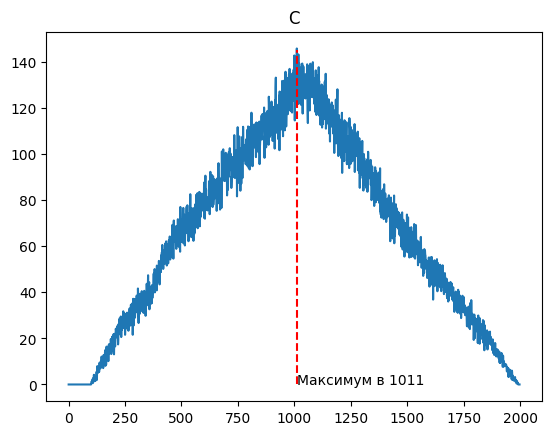

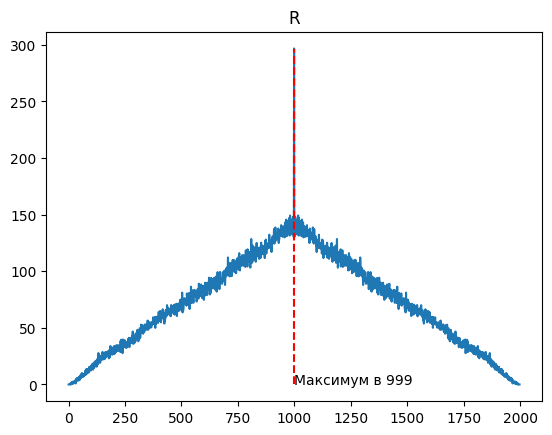

In [17]:
fig = plt.figure()
get_len(R, fig, 111, 'C', True)
fig.show()
fig = plt.figure()
get_len(C, fig, 111, 'R', True)
fig.show()

# 3.Шум

In [18]:
x = np.array([0]*1000)
y = np.array([0]*1000)
x[400:500] = 10
y[700:800] = 5

![12](./img/ОСШ.png)
![12](./img/квадрат_амплитуды.png)

In [19]:
def s_generate(data, _len = 1000):
    data = data-10
    kof = np.sqrt(2.5)/(10**(data/20))
    s = np.array(
        list(
            map(
                lambda item:
                kof*((-1)**(np.random.random() < 0.5))*item,
                np.random.sample((_len))
            )
        )
    )
    return s

In [20]:
осш = np.arange(-15, 15, 0.3)

In [21]:
ver = []
for item in осш:
    gut = []
    for i in range(1000):
        s = s_generate(item)
        _y = y+s
        cor = np.convolve(x, _y, "full")
        data = (cor.argmax())/2
        if 590 < data and data < 710:
            gut.append(1)
            continue
        gut.append(0)
        """
        fig = plt.figure()
        get_len(_y, fig, 211, str(item))
        if item > 0:
            get_len(cor, fig, 212, '', True)
        else:
            get_len(cor, fig, 212, '')
        fig.show()
        break"""
    ver.append(sum(gut)/len(gut))


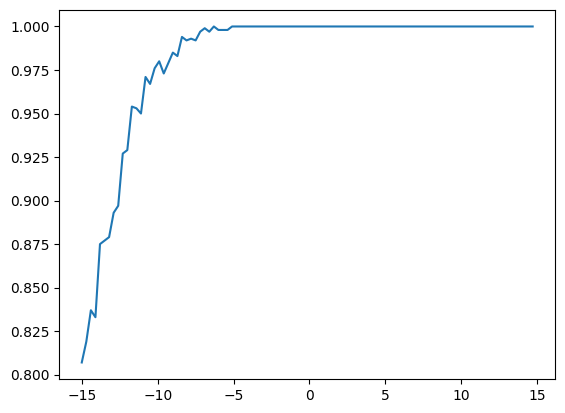

In [22]:
plt.plot(осш, ver)

In [23]:
ver = []
for item in осш:
    gut = []
    for i in range(1000):
        s = s_generate(item)
        _y = y+s
        cor = np.convolve(y, _y, "full")
        data = cor.argmax()
        if 1450 < data and data < 1550:
            gut.append(1)
            continue
        gut.append(0)
        """
        fig = plt.figure()
        get_len(_y, fig, 211, str(item))
        if item > 0:
            get_len(cor, fig, 212, '', True)
        else:
            get_len(cor, fig, 212, '')
        fig.show()
        break"""
    ver.append(sum(gut)/len(gut))

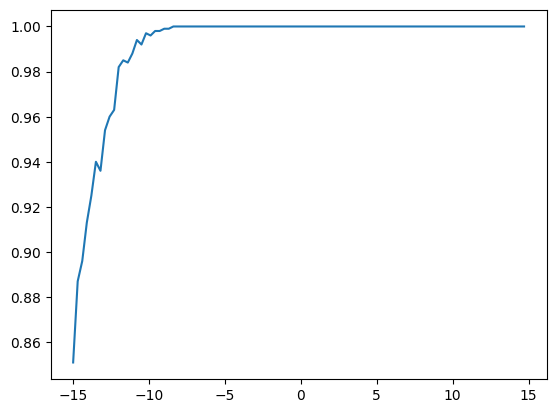

In [24]:
plt.plot(осш, ver)

# 4.Синус

In [25]:
x = np.sin(np.arange(1,50,0.1))

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\3061518977.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


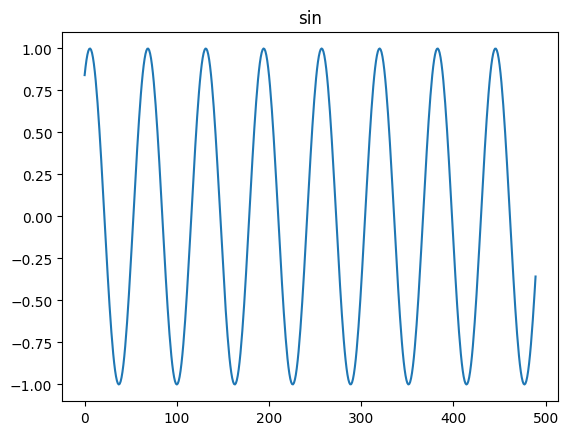

In [26]:
fig = plt.figure()
get_len(x, fig, 111, 'sin')
fig.show()

In [27]:
s = np.array(
    list(
        map(
            lambda iter:
            (-1)**(np.random.random()<0.5)*iter,
            np.random.sample((len(x)))
        )
    )
)
x = x+s

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\3027699710.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


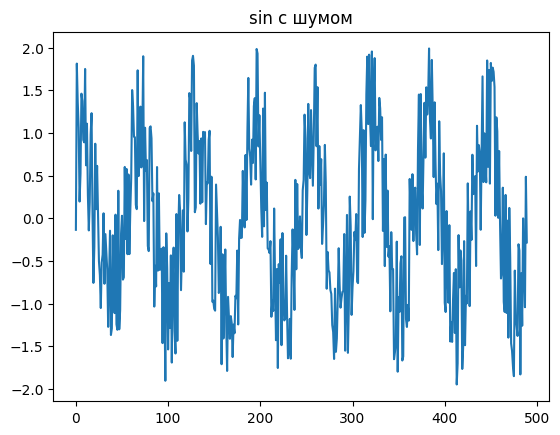

In [28]:
fig = plt.figure()
get_len(x, fig, 111, 'sin с шумом')
fig.show()

In [29]:
R= np.correlate(x, x, 'full')

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2849004232.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


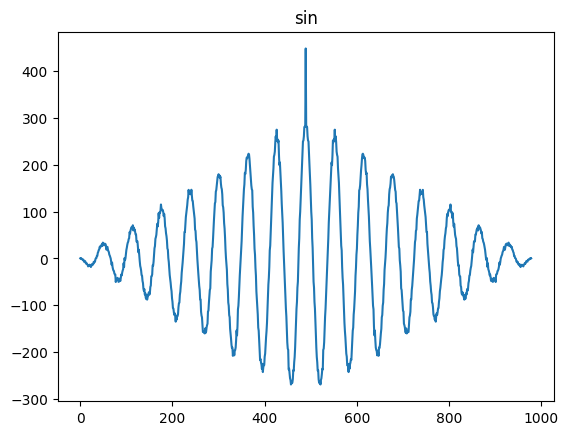

In [30]:
fig = plt.figure()
get_len(R, fig, 111, 'sin')
fig.show()

# 5. Код Баркера

In [31]:
code = [+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1]

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\477875336.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


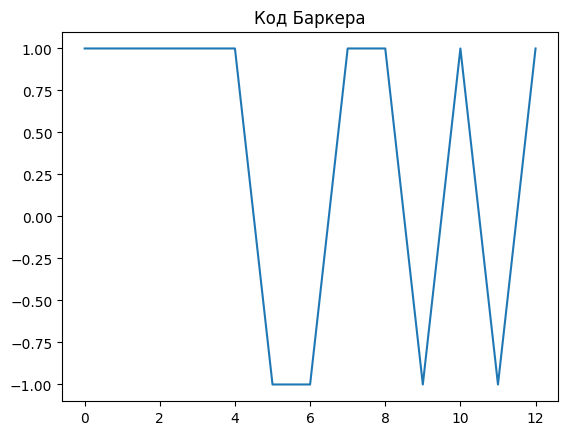

In [32]:
fig = plt.figure()
get_len(code, fig, 111, 'Код Баркера')
fig.show()

In [33]:
x = np.array(
    list(
        map(
            lambda iter:
            (-1)**(iter<0.5),
            np.random.sample((13))
        )
    )
)

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2517486379.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


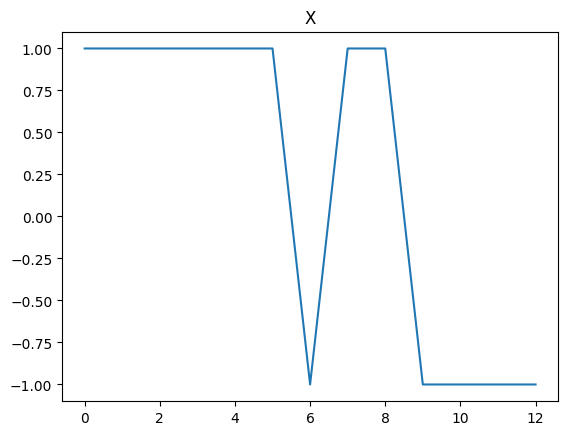

In [34]:
fig = plt.figure()
get_len(x, fig, 111, 'X')
fig.show()

In [35]:
R_bar = np.correlate(code, code, 'full')
R = np.correlate(x, x, 'full')

C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2889208073.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Filic\AppData\Local\Temp\ipykernel_27032\2889208073.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


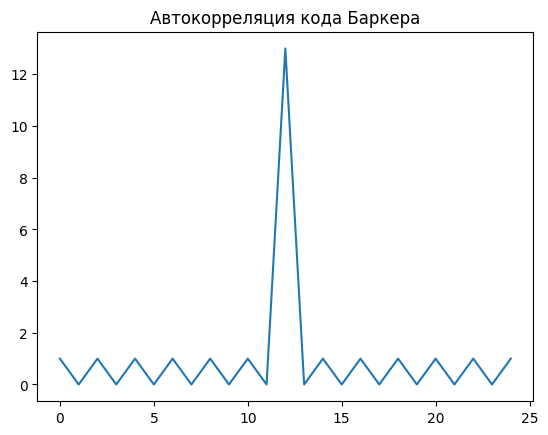

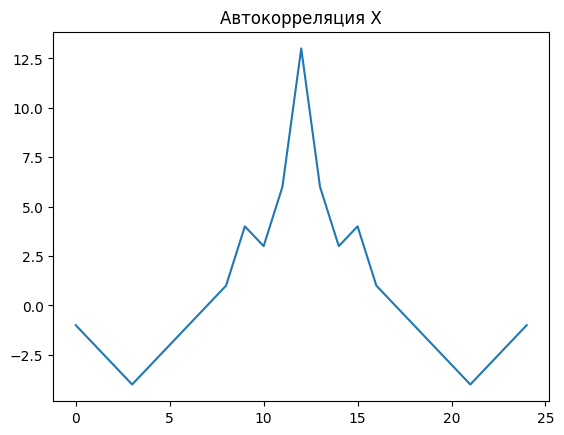

In [36]:
fig = plt.figure()
get_len(R_bar, fig, 111, 'Автокорреляция кода Баркера')
fig.show()
fig = plt.figure()
get_len(R, fig, 111, 'Автокорреляция X')
fig.show()

# 6. опыт из 3-го пункта с кодом бракера

In [37]:
x = [+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1]

![12](./img/ОСШ.png)
![12](./img/квадрат_амплитуды.png)

In [38]:
def s_generate(data, _len = 13):
    data = data
    kof = np.sqrt(1)/(10**(data/20))
    s = np.array(
        list(
            map(
                lambda item:
                kof*((-1)**(np.random.random() < 0.5))*item,
                np.random.sample((_len))
            )
        )
    )
    return s

In [39]:
осш = np.arange(-15, 15, 0.3)

In [40]:
ver = []
for item in осш:
    gut = []
    for i in range(1000):
        s = s_generate(item)
        _x = x+s
        cor = np.convolve(x, _x, "full")
        data = cor.argmax()
        if 14 < data and data < 16:
            gut.append(1)
            continue
        gut.append(0)
        """
        fig = plt.figure()
        get_len(_x, fig, 211, str(item))
        if item > 0:
            get_len(cor, fig, 212, '', True)
        else:
            get_len(cor, fig, 212, '')
        fig.show()
        break"""
    ver.append(sum(gut)/len(gut))

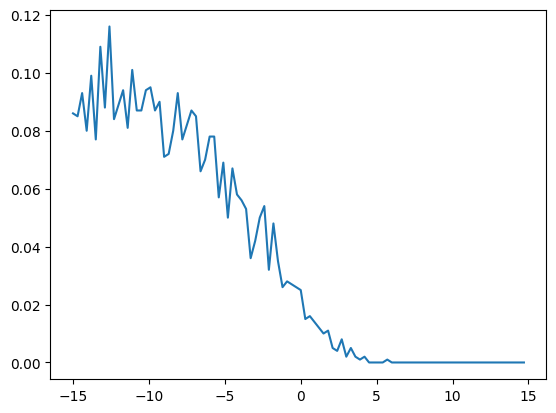

In [41]:
plt.plot(осш, ver)

In [42]:
x = np.array(
    list(
        map(
            lambda iter:
            (-1)**(iter<0.5),
            np.random.sample((13))
        )
    )
)

In [43]:
ver = []
for item in осш:
    gut = []
    for i in range(1000):
        s = s_generate(item)
        _x = x+s
        cor = np.convolve(x, _x, "full")
        data = cor.argmax()
        if 14 < data and data < 16:
            gut.append(1)
            continue
        gut.append(0)
        """
        fig = plt.figure()
        get_len(_x, fig, 211, str(item))
        if item > 0:
            get_len(cor, fig, 212, '', True)
        else:
            get_len(cor, fig, 212, '')
        fig.show()
        break"""
    ver.append(sum(gut)/len(gut))

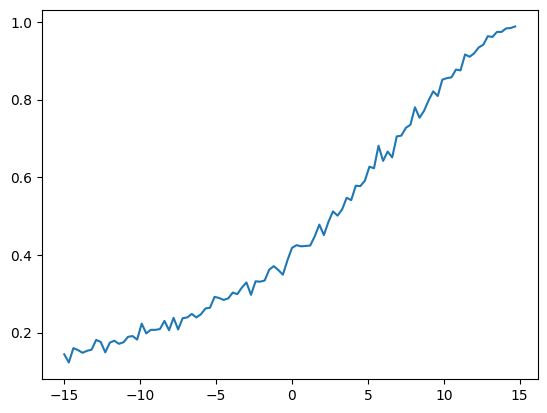

In [44]:
plt.plot(осш, ver)

# 7. Найти мат ожидание, сигма, сигма квадрат,  построить гистограмму w(t) для сигнала:

In [58]:
def f(data : np.array):
    return np.sin(2*np.pi*data*5)

In [59]:
x = f(np.arange(0, 10, 0.01))

C:\Users\Filic\AppData\Local\Temp\ipykernel_46540\2517486379.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


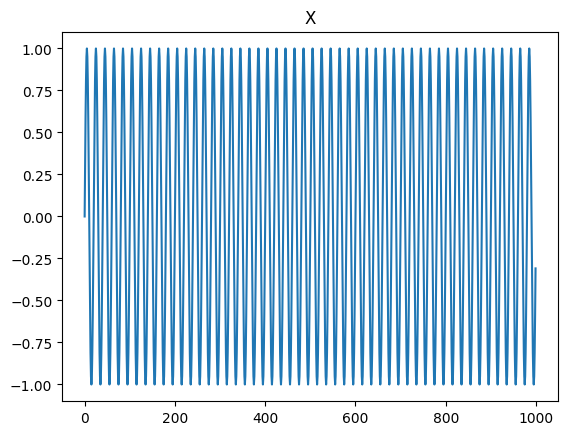

In [60]:
fig = plt.figure()
get_len(x, fig, 111, 'X')
fig.show()

In [61]:
def get_hist(line : np.array, fig : plt.Figure, pos, name, print_max = False):
    ax = fig.add_subplot(pos)
    ax.hist(line)
    if print_max:
        max = np.max(line)
        idx = np.where(line == max)[0]
        for id, indx in enumerate(idx):
            ax.plot([indx]*(int(max)+1), np.arange(0, int(max)+1), '--r')
            ax.text(indx, 0+30*id, 'Максимум в '+str(indx))
    plt.title(name)

C:\Users\Filic\AppData\Local\Temp\ipykernel_46540\360013804.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


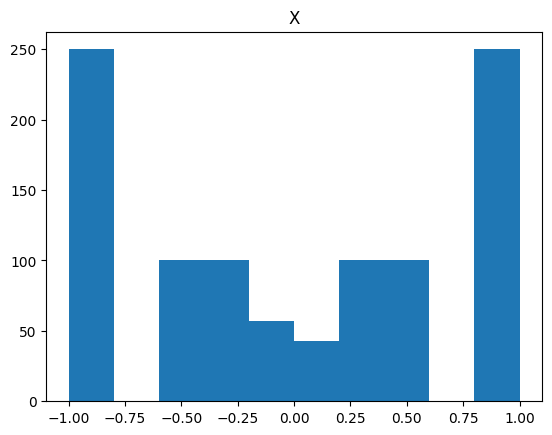

: 

In [ ]:
fig = plt.figure()
get_hist(x, fig, 111, 'X')
fig.show()

In [45]:
print('Mean', x.mean())
print('Std', x.std())
print('Vairance', x.var())

Mean -7.460698725481052e-17
Std 0.7071067811865474
Vairance 0.4999999999999997
